📅 Encuentro Final – Presentación de Proyectos

Bienvenido al proyecto integrador.

La idea de este proyecto es crear modelos útiles para cada persona. El ejercicio tiene muchos retos interesantes que tendrán que superar para poder llegar a una entrega satisfactoria. Se recomienda un grupo de tres a cinco personas para trabajar, puesto que hay muchas tareas que realizar y dado que la interpretación de algunas salidas se puede nutrir con diversos puntos de vista. Se enunciarán los problemas por separado y se espera que en el grupo se distribuyan en cada fase el estudio proporcionado de variables, modelos y salidas.

Objetivo: Cada grupo (máximo 3 personas) debe presentar un proyecto de Machine Learning aplicado a su área de acción profesional o académica.

In [1]:
# Se cargan las librerias necesarias para hacer la guia 3.
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


1️⃣ PREPROCESAMIENTO (EDA BÁSICO)

In [2]:
#1️⃣ Preprocesamiento (EDA básico)
#Cargar el dataset y visualizar las primeras filas (df.head()).

df = pd.read_excel("C:\\Users\\Lenovo\\Documents\\Machine learning 1\\Proyecto final\\datos_modelo.xlsx")



SE MUESTRAN LAS PRIMERAS FILAS Y LA DESCRIPCIÓN GENERAL DEL DATASET

In [3]:

# Ahora se imprime la descripción general de los datos. 

print(f"Esta es la vista general de la base de datos:\n\n {df.head()}\n")
print(f"Esta es la descipción general de la base de datos:\n\n {df.describe()}\n")

Esta es la vista general de la base de datos:

          date       type    area  company   routes  \
0  2020-03-29  PERMISSAO  AREA 1      106  1012-10   
1  2020-03-29  PERMISSAO  AREA 1      106  1012-10   
2  2020-03-29  PERMISSAO  AREA 1      106  1012-10   
3  2020-03-29  PERMISSAO  AREA 1      106  1012-10   
4  2020-03-29  PERMISSAO  AREA 1      106  1012-10   

                             name  passengers  trip_id start_time  end_time  \
0  JD MONTE BELO/TERM JD BRITANIA         610  1012-10   05:00:00  05:59:00   
1  JD MONTE BELO/TERM JD BRITANIA         610  1012-10   06:00:00  06:59:00   
2  JD MONTE BELO/TERM JD BRITANIA         610  1012-10   07:00:00  07:59:00   
3  JD MONTE BELO/TERM JD BRITANIA         610  1012-10   08:00:00  08:59:00   
4  JD MONTE BELO/TERM JD BRITANIA         610  1012-10   09:00:00  09:59:00   

   headway_secs  
0           480  
1           480  
2           480  
3           480  
4           480  

Esta es la descipción general de la base de

SE CALCULA LOS VALORES NULOS EN PORCENTAJE

In [4]:
valores_nulos = (df.isnull().sum()/len(df)*100)

print(f"Estos son los valores nulos de la base de datos:\n{valores_nulos}")

if valores_nulos.any():
  print(f"Estos son los valores nulos:{valores_nulos}")
else:
  print("No existen valores nulos en la base de datos")


Estos son los valores nulos de la base de datos:
date            0.0
type            0.0
area            0.0
company         0.0
routes          0.0
name            0.0
passengers      0.0
trip_id         0.0
start_time      0.0
end_time        0.0
headway_secs    0.0
dtype: float64
No existen valores nulos en la base de datos


SE CAMBIA LA VARIABLE "DATE" POR SERIES TEMPORALES

In [5]:
# Se cambian los datos a formato de año, mes, dia, y semana
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.weekday +1




SE CODIFICAN LOS VARIABLES DE START TIME AND END TIME

In [6]:
import numpy as np

# Convertir la hora en un número continuo
df["start_time"] = pd.to_datetime(df["start_time"], format= "%H:%M:%S", errors="coerce").dt.time

df["hour_continuous_start"] = df["start_time"].apply(lambda x: x.hour + x.minute / 60 + x.second / 3600)

# Aplicar la transformación seno/coseno
df["hour_sin_s"] = np.sin(2 * np.pi * df["hour_continuous_start"] / 24)
df["hour_cos_s"] = np.cos(2 * np.pi * df["hour_continuous_start"] / 24)

df.to_csv("Base de Buses.csv", index=False)
import os 

print(f"se guardaron los datos en: {os.getcwd()}")


se guardaron los datos en: c:\Users\Lenovo\Documents\Machine learning 1\Proyecto final


['company', 'passengers', 'headway_secs', 'year', 'month', 'day', 'weekday', 'hour_continuous_start', 'hour_sin_s', 'hour_cos_s', 'hour_continuous_end', 'hour_sin_e', 'hour_cos_e']
date                     datetime64[ns]
type                             object
area                             object
company                           int64
routes                           object
name                             object
passengers                        int64
trip_id                          object
start_time                       object
end_time                         object
headway_secs                      int64
year                              int32
month                             int32
day                               int32
weekday                           int32
hour_continuous_start           float64
hour_sin_s                      float64
hour_cos_s                      float64
hour_continuous_end             float64
hour_sin_e                      float64
hour_cos_e         

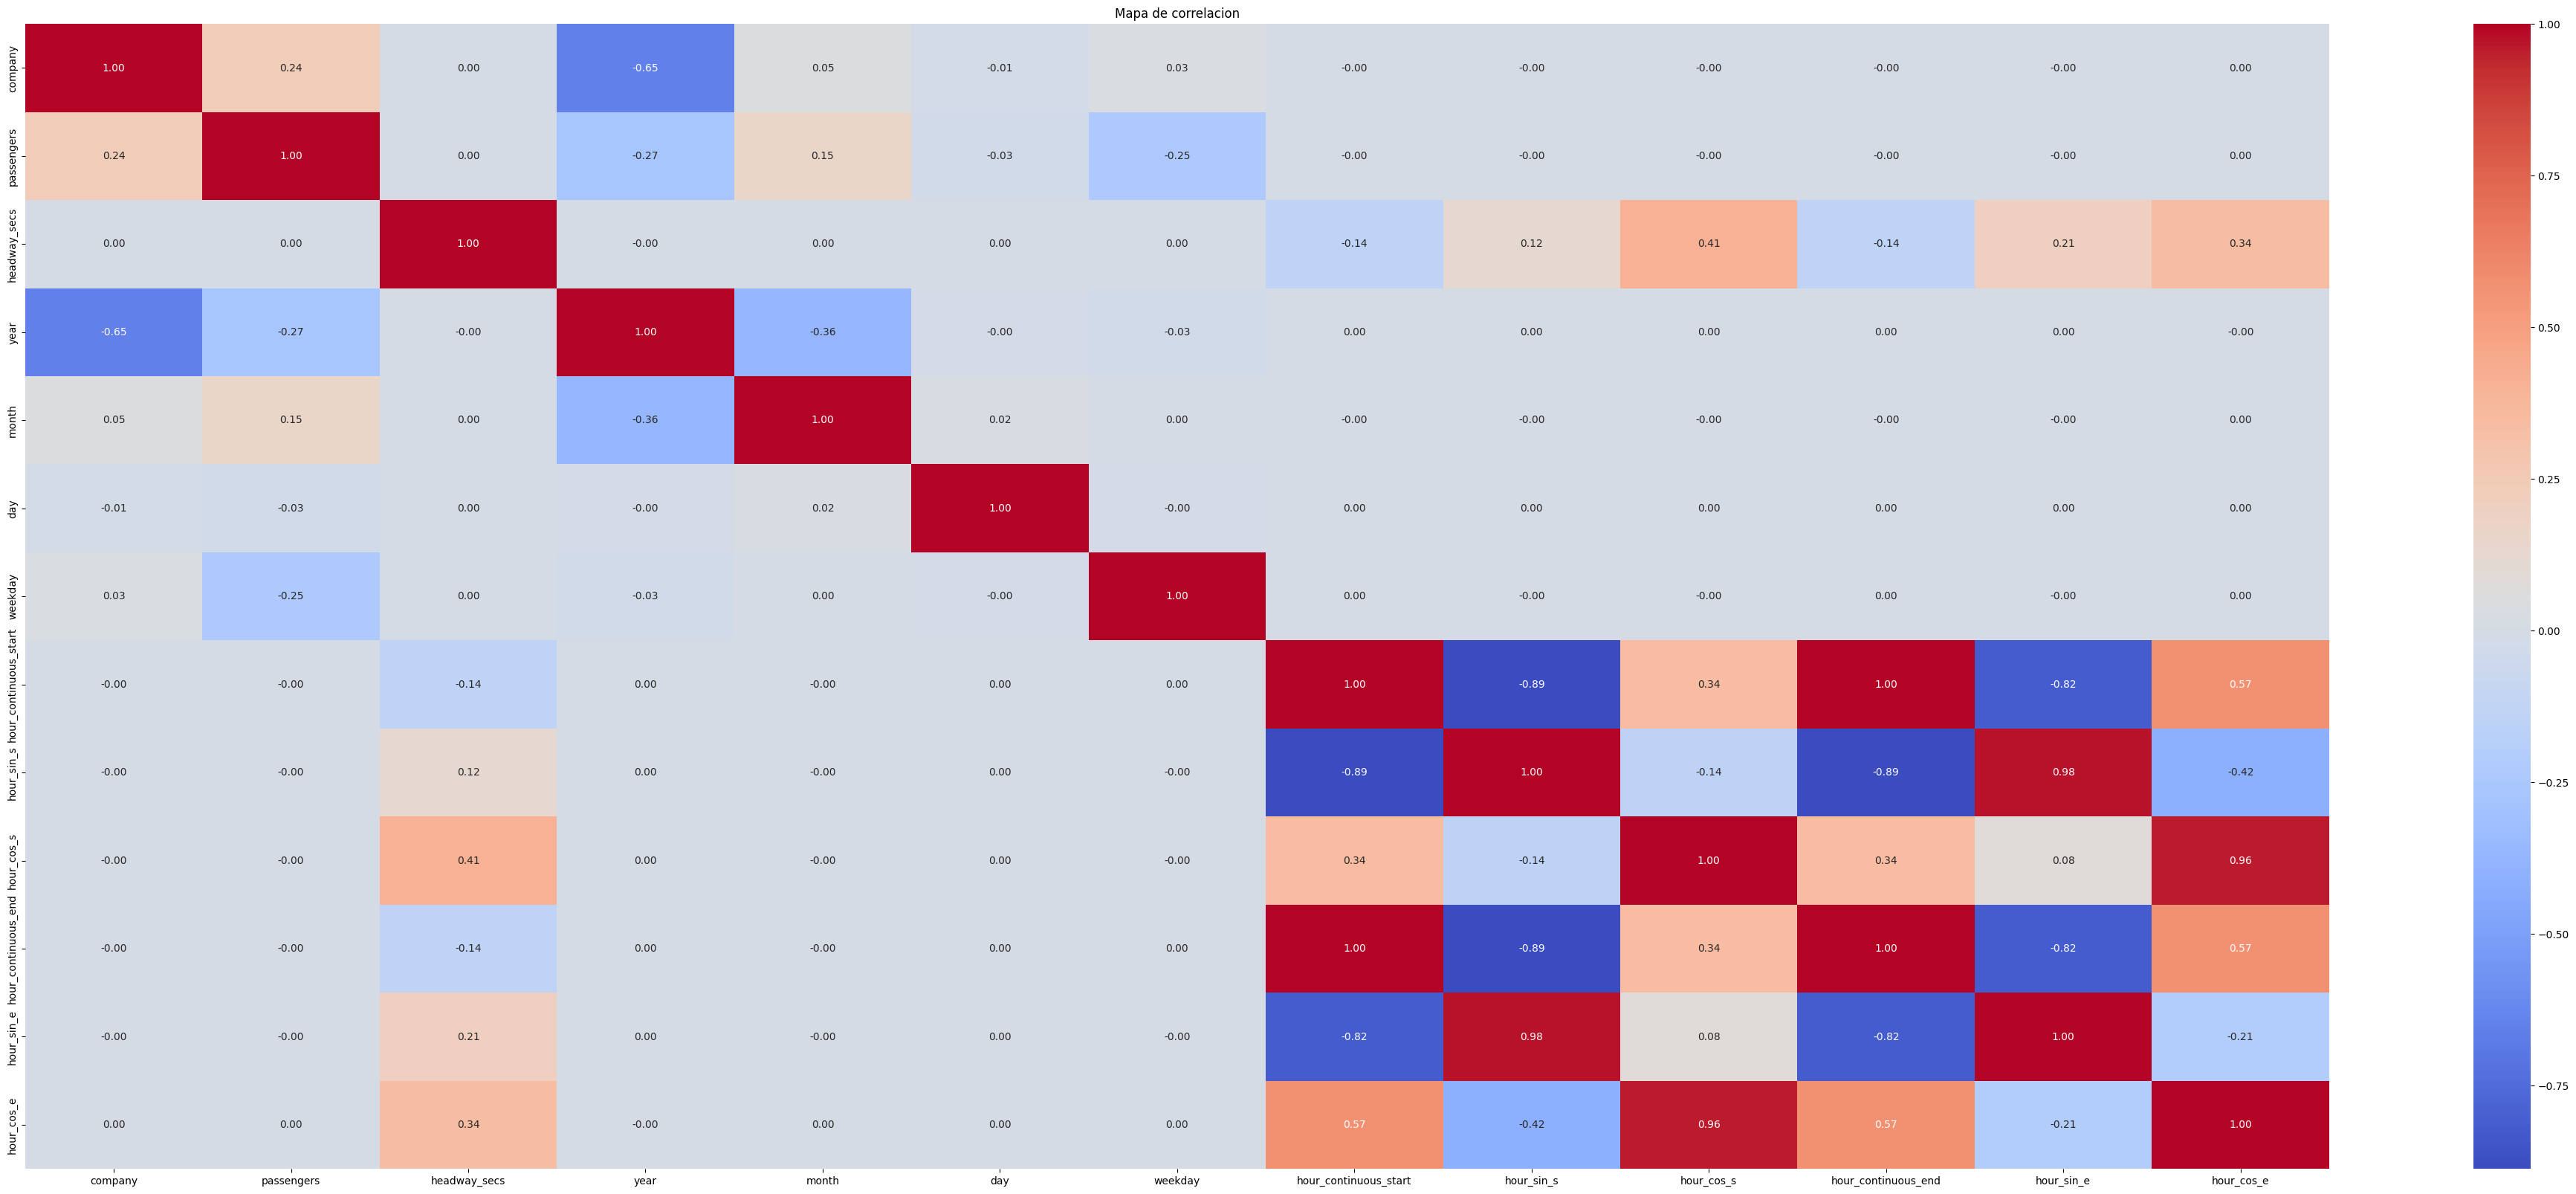

In [8]:

numerical_cols = df.select_dtypes(include=["int64","float64","int32"]).columns.tolist()
print(numerical_cols)
print(df.dtypes)

regresion_lineal = df[numerical_cols]

matriz_correlacion = regresion_lineal.corr()

plt.figure(figsize=(50,20))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlacion")
plt.show()

SELECCIONAR SOLO VARIABLES NUMÉRICAS PARA EL ANÁLISIS.

In [82]:
# Seleccionar solo columnas numérica
X = df.select_dtypes(include=["number"])
df_final_united = df[numerical_cols].copy()

DESPUES SE ESCALAN LOS DATOS.

In [188]:
# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)


SE APLICA LA REDUCCIÓN DE DATOS PCA

In [189]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

SE INTRODUCE EL MODELO DBSCAN - NÚMERO DE COMPONENTES - METRICAS SILHOUETTE Y DAVIES BOULDIN

In [190]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5,n_jobs=-1)
etiquetas = dbscan.fit_predict(X_pca)

# Se mide la varianza acumulada para saber 
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
componentes_optimos = np.argmax(varianza_acumulada >= 0.85)+1
print(f"📊 Número óptimo de componentes scaler: {componentes_optimos}")


df_limpio = df[df["cluster"] != -1]
X_pca_limpio =X_pca[df["cluster"] != -1]

silhouette_avg_dbscan = silhouette_score(X_pca, df_limpio["cluster"] )
print(f"Silhouette Score DBSCAN (Scaler): {silhouette_avg_dbscan:.3f}")


# Calculamos el Silhouette Score para Davis Boudins.
db_score_scaler = davies_bouldin_score(X_pca, df_limpio["cluster"])

print(f"Davis Boudin Score DBSCAN (Scaler): {db_score_scaler:.2f}") 


📊 Número óptimo de componentes scaler: 1
Silhouette Score DBSCAN (Scaler): 0.638
Davis Boudin Score DBSCAN (Scaler): 0.41


SE GRÁFICA EL MODELO DBSCAN CON STANDARSCALER Y PCA

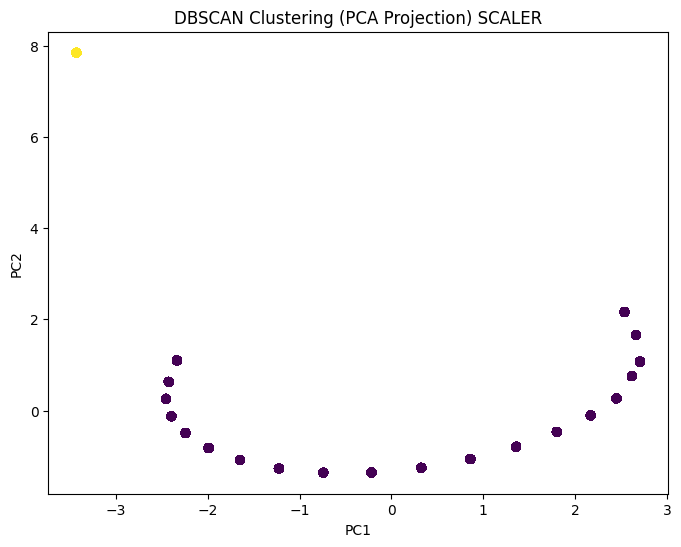

In [191]:

# Se gráfica DBSCAN Scaler 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering (PCA Projection) SCALER')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

SE ESTIMA EL MEJOR PUNTO DE EPS

EPS Optimo:2.498001805406602e-16


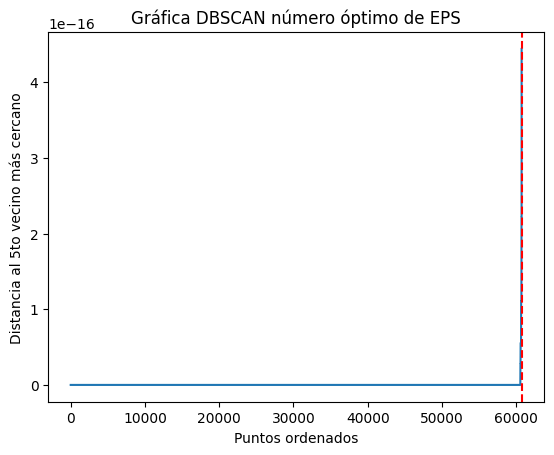

In [55]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt


vecinos_scaler = NearestNeighbors(n_neighbors=5, metric="euclidean")
vecinos_scaler.fit(X_pca)
distancias, indices = vecinos_scaler.kneighbors(X_pca)


distancias_scaler_ordenadas= np.sort(distancias[:,-1])
punto_optimo = np.argmax(np.diff(distancias_scaler_ordenadas))

eps_optimo =  distancias_scaler_ordenadas[punto_optimo]
print(f"EPS Optimo:{eps_optimo}")



distancias_scaler = np.sort(distancias[:, -1], axis=0)
plt.plot(distancias_scaler)
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5to vecino más cercano")
plt.axvline(x=punto_optimo, color='red', linestyle='--', label=f"Punto óptimo ({punto_optimo})")
plt.title("Gráfica DBSCAN número óptimo de EPS")
plt.show()

VARIANZA ACUMULADA


Promedio por clúster - minmax (StandardScaler):
Cluster_final                    0            1
company                 106.806037   106.806037
passengers             5649.586384  5649.586384
headway_secs            536.842105  3600.000000
year                   2018.016057  2018.016057
month                     6.423250     6.423250
day                      15.847784    15.847784
weekday                   3.930636     3.930636
hour_continuous_start    13.500000     3.000000
hour_sin_s               -0.093133     0.707107
hour_cos_s               -0.224843     0.707107
hour_continuous_end      14.483333     3.983333
hour_sin_e               -0.147310     0.863836
hour_cos_e               -0.193722     0.503774


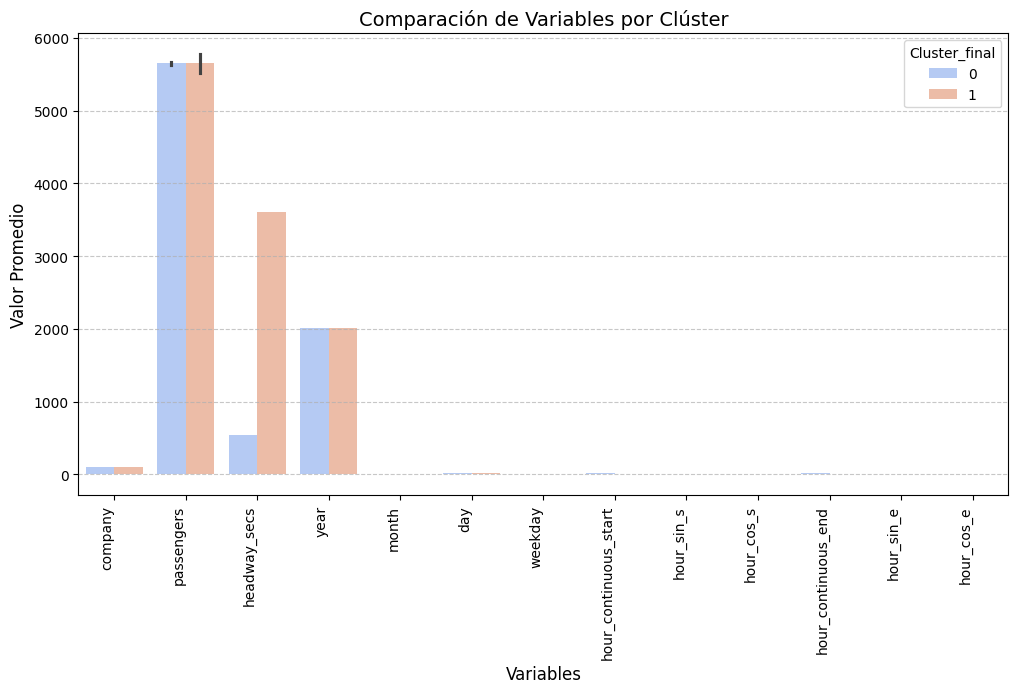

In [171]:




X["Cluster_final"] = etiquetas
promedios = X.groupby("Cluster_final").mean()
print("\nPromedio por clúster - minmax (StandardScaler):")
print(promedios.T)


# Transformar el DataFrame para mejor visualización
df_melted = X.melt(id_vars=["Cluster_final"], var_name="Variable", value_name="Valor Promedio")

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.barplot(x="Variable", y="Valor Promedio", hue="Cluster_final", data=df_melted, palette="coolwarm")

# Mejorar visualización
plt.xticks(rotation=90, ha="right")  # Ajustar etiquetas de variables
plt.title("Comparación de Variables por Clúster", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Valor Promedio", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()





📌 **Análisis de los clusters**  

Este cuadro muestra el promedio de varias variables para dos grupos creados con **DBSCAN** y **StandardScaler**. Vamos a destacar las diferencias clave:  

🔹 **Cluster 0** (Más frecuente, posiblemente el grupo dominante)  

✅ **Mayor distribución horaria:** El inicio y fin de actividad están **entre las 13:50 y 14:48**, lo que sugiere operaciones en horario de la tarde.  

✅ **Menor intervalo entre servicios:** `headway_secs` es **536 segundos**, indicando menor tiempo de espera entre buses.  

✅ **Valores negativos en `hour_sin_s` y `hour_cos_s`**, indicando que los eventos ocurren principalmente en la segunda mitad del día.  

🔹 **Cluster 1** (Posible grupo minoritario o diferente comportamiento)  

✅ **Horarios muy diferentes:** Actividad **entre las 3:00 y 3:98**, sugiriendo eventos en la madrugada.

✅ **Mayor tiempo entre servicios:** `headway_secs` es **3600 segundos**, lo que sugiere mayor intervalo entre buses (menos frecuencia). 

✅ **Valores positivos en `hour_sin_s` y `hour_cos_s`**, indicando eventos en la primera parte del día.  

📊 **Conclusión:**  

🚍 **Cluster 0 parece representar operaciones estándar** con una alta frecuencia de pasajeros en horas de la tarde.  

🌙 **Cluster 1 podría ser un servicio de madrugada** con menor frecuencia operativa y menos pasajeros.  




📊 Distribución de compañías en los clusters:
Cluster_final      0     1
company                   
106            11476   302
107            47690  1255


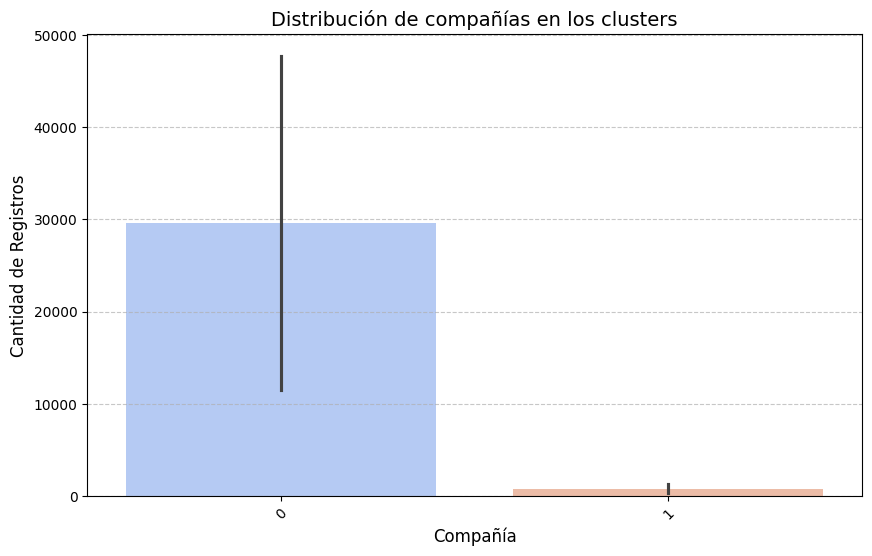

In [155]:
comparacion_empresas = X.groupby(["Cluster_final", "company"]).size().unstack()
print("\n📊 Distribución de compañías en los clusters:")
print(comparacion_empresas.T)


import matplotlib.pyplot as plt
import seaborn as sns

# Crear la gráfica
plt.figure(figsize=(10,6))
sns.barplot(data=comparacion_empresas.T, palette="coolwarm")

# Personalizar la gráfica
plt.title("Distribución de compañías en los clusters", fontsize=14)
plt.xlabel("Compañía", fontsize=12)
plt.ylabel("Cantidad de Registros", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()

🔹 Cluster 0:

✅ La compañía 106 tiene 11,476 registros.

✅ La compañía 107 tiene 47,690 registros.

📌 Conclusión: Esta agrupación representa la mayoría de los datos, con una presencia fuerte de la compañía 107.

🔹 Cluster 1:

✅ La compañía 106 tiene 302 registros.

✅ La compañía 107 tiene 1,255 registros.

📌 Conclusión: Este grupo es mucho más pequeño, pero sigue manteniendo una presencia mayor de la compañía 107.


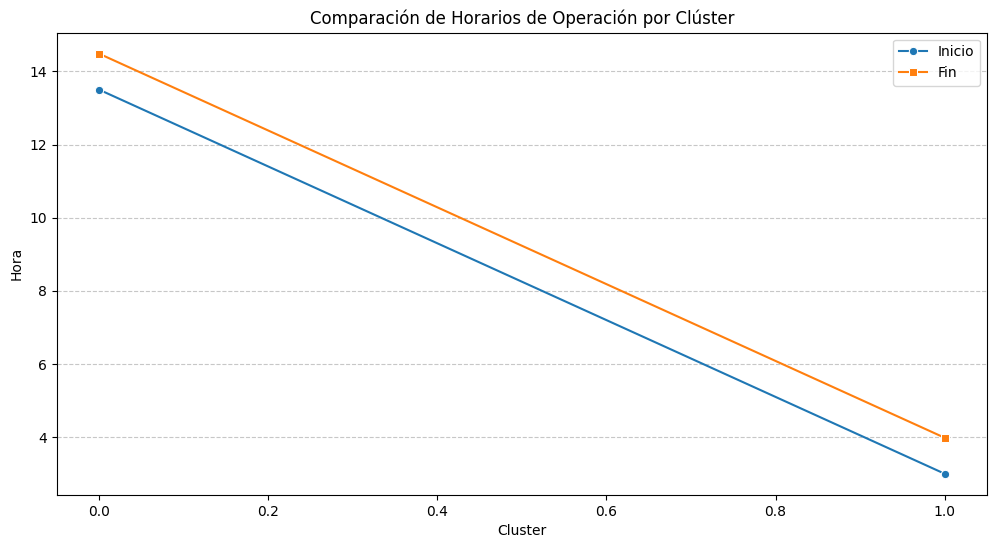

In [186]:
plt.figure(figsize=(12,6))
sns.lineplot(x=promedios.T.columns, y=promedios.T.loc["hour_continuous_start"], marker="o", label="Inicio")
sns.lineplot(x=promedios.T.columns, y=promedios.T.loc["hour_continuous_end"], marker="s", label="Fin")
plt.title("Comparación de Horarios de Operación por Clúster")
plt.xlabel("Cluster")
plt.ylabel("Hora")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


📊 Distribución de espera en los clusters:
Cluster_final
0     536.842105
1    3600.000000
Name: headway_secs, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28684\1510853742.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




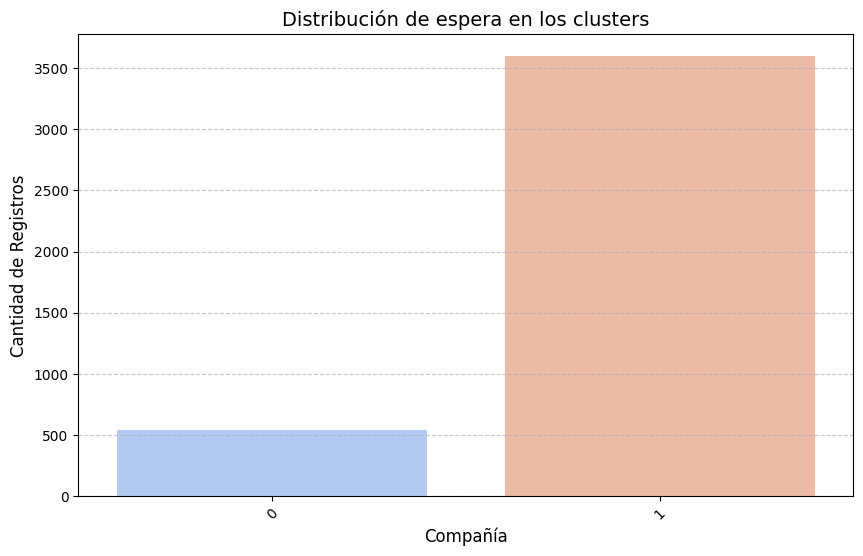

In [ ]:
#Comparar el nivel de espera por cluster
comparacion_empresas = X.groupby("Cluster_final") ["headway_secs"].mean()
print("\n📊 Distribución de espera en los clusters:")
print(comparacion_empresas.T)



# Crear la gráfica
plt.figure(figsize=(10,6))
sns.barplot(data=comparacion_empresas.T, palette="coolwarm")

# Personalizar la gráfica
plt.title("Distribución de espera en los clusters", fontsize=14)
plt.xlabel("Compañía", fontsize=12)
plt.ylabel("Cantidad de Registros", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()


📊 Total de pasajeros por día de la semana:
Cluster_final
0    334263428
1      8796406
Name: passengers, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28684\1441518986.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




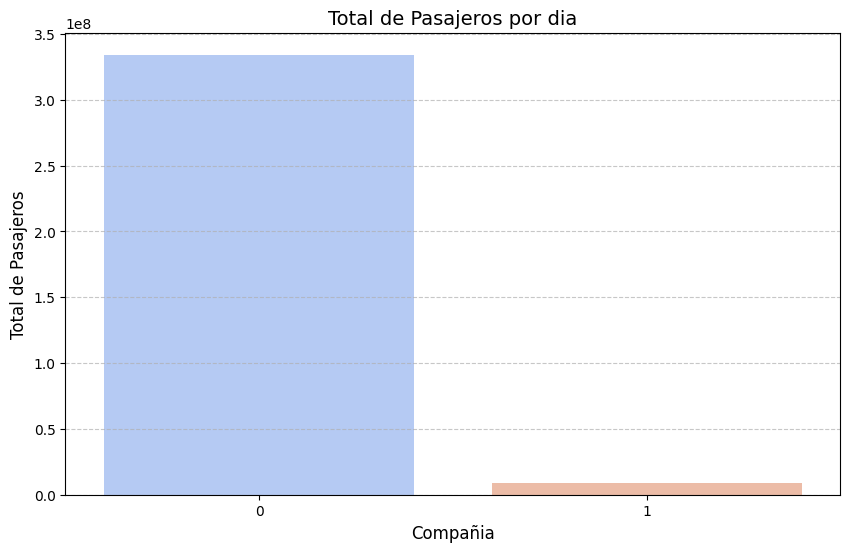

In [173]:


# Agrupar pasajeros por día de la semana
pasajeros_por_dia = X.groupby("Cluster_final")["passengers"].sum()

# Mostrar los resultados en tabla
print("\n📊 Total de pasajeros por día de la semana:")
print(pasajeros_por_dia)

# Crear la gráfica de barras
plt.figure(figsize=(10,6))
sns.barplot(x=pasajeros_por_dia.index, y=pasajeros_por_dia.values, palette="coolwarm")

# Personalización
plt.title("Total de Pasajeros por dia", fontsize=14)
plt.xlabel("Compañia", fontsize=12)
plt.ylabel("Total de Pasajeros", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()

PASAJEROS POR DIA 


📊 Total de pasajeros por día de la semana:
weekday
1    5578.313253
2    5963.000000
3    6635.391509
4    6692.223810
5    6535.487923
6    5305.751174
7    3065.639130
Name: passengers, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28684\37771296.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




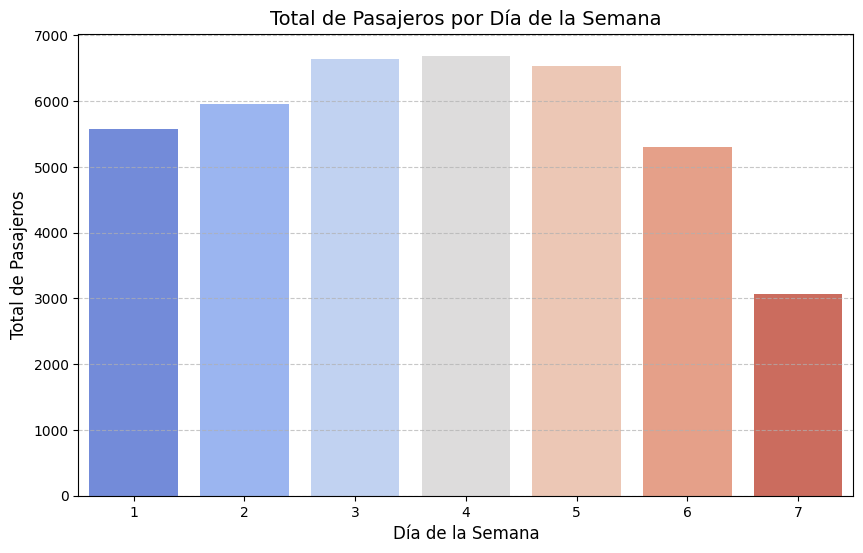

In [150]:


# Agrupar pasajeros por día de la semana
pasajeros_por_dia = X.groupby("weekday")["passengers"].mean()

# Mostrar los resultados en tabla
print("\n📊 Total de pasajeros por día de la semana:")
print(pasajeros_por_dia)

# Crear la gráfica de barras
plt.figure(figsize=(10,6))
sns.barplot(x=pasajeros_por_dia.index, y=pasajeros_por_dia.values, palette="coolwarm")

# Personalización
plt.title("Total de Pasajeros por Día de la Semana", fontsize=14)
plt.xlabel("Día de la Semana", fontsize=12)
plt.ylabel("Total de Pasajeros", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()


📊 Total de pasajeros por día de la semana:
month
1     4182.826389
2     5861.945736
3     5202.500000
4     5212.518248
5     6201.700000
6     5119.113043
7     5578.869159
8     6351.690647
9     6580.126984
10    6019.282443
11    6214.845588
12    5496.418605
Name: passengers, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28684\43312326.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




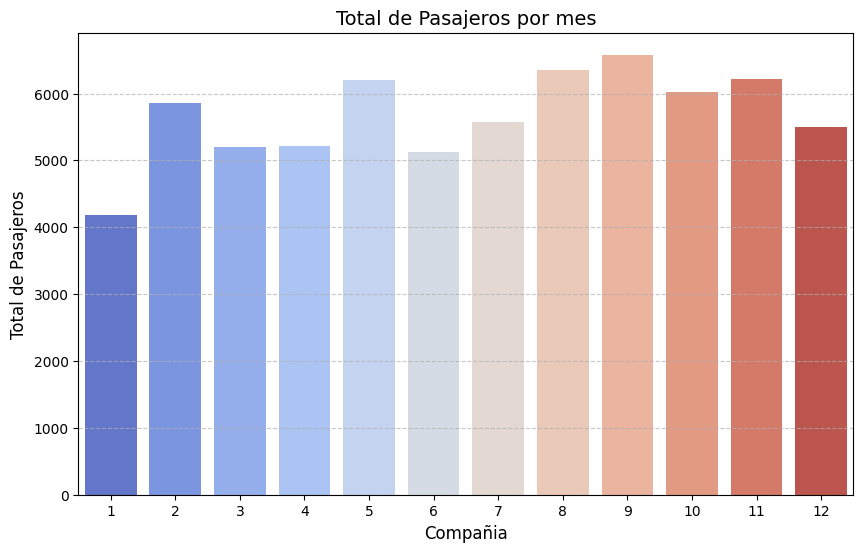

In [ ]:


# Agrupar pasajeros por mes
pasajeros_por_dia = X.groupby("month")["passengers"].mean()

# Mostrar los resultados en tabla
print("\n📊 Total de pasajeros por día de la semana:")
print(pasajeros_por_dia)

# Crear la gráfica de barras
plt.figure(figsize=(10,6))
sns.barplot(x=pasajeros_por_dia.index, y=pasajeros_por_dia.values, palette="coolwarm")

# Personalización
plt.title("Total de Pasajeros por mes", fontsize=14)
plt.xlabel("Compañia", fontsize=12)
plt.ylabel("Total de Pasajeros", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()

📊 **¿Para qué te sirve este análisis?**  

Este tipo de segmentación con **DBSCAN y PCA** tiene **múltiples aplicaciones estratégicas**, dependiendo de lo que se investiga. Estas son algunas estratégias.

🚍 **Optimización de rutas y horarios** → Al analizar un sistema de transporte, se pueden ajustar horarios y frecuencia de buses según los patrones detectados en cada cluster.  

📊 **Mejora en la asignación de recursos** → Si el Cluster 1 representa baja frecuencia operativa en la madrugada, se puede decidir si es necesario reforzar el servicio o mantenerlo reducido para optimizar costos.  

🔍 **Detección de anomalías** → Se pueden detectar anomalias en el servicio, como el punto amarillo en el gráfico de arriba.

👥 **Segmentación de usuarios o clientes** → Si se aplica este tipo de análisis en otro contexto (marketing, ventas, comportamiento de clientes), se puede identificar grupos con diferentes necesidades y personalizar estrategias para cada segmento.  



___________________________________________________________________________________________________________________________________________

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Variables predictoras y dependiente
X = df[["hour_sin_s", "hour_cos_s", "hour_sin_e", "hour_cos_e", "weekday", "month", "day"]]
y = df["headway_secs"]

# Escalar datos para modelos que lo requieren (Regresión Lineal)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🚀 Modelo 1: **Regresión Lineal**
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# 🚀 Modelo 2: **Random Forest**
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# 🚀 Modelo 3: **Gradient Boosting**
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

# Evaluación de cada modelo
def evaluar_modelo(nombre, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n🔹 **Resultados de {nombre}:**")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")

# Comparar los tres modelos
evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)
evaluar_modelo("Gradient Boosting", y_test, y_pred_gb)


🔹 **Resultados de Regresión Lineal:**
MAE: 214.70 | RMSE: 438.71 | R²: 0.19

🔹 **Resultados de Random Forest:**
MAE: 0.00 | RMSE: 0.00 | R²: 1.00

🔹 **Resultados de Gradient Boosting:**
MAE: 0.01 | RMSE: 0.01 | R²: 1.00


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Variables predictoras y dependiente
X = df[["hour_sin_s", "hour_cos_s", "hour_sin_e", "hour_cos_e", "weekday", "month", "day", "headway_secs"]]
y = df["passengers"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_gb.fit(X_train, y_train)

# Predicciones
y_pred_gb = model_gb.predict(X_test)

# Evaluación del modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Importancia de variables
importances = model_gb.feature_importances_
features = X.columns

print("\n🔹 **Importancia de Variables:**")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

print(f"\n🔹 **Resultados del Modelo:**")
print(f"MAE (Gradient Boosting): {mae_gb:.2f}")
print(f"RMSE (Gradient Boosting): {rmse_gb:.2f}")
print(f"R² (Gradient Boosting): {r2_gb:.2f}")


🔹 **Importancia de Variables:**
hour_sin_s: 0.0001
hour_cos_s: 0.0000
hour_sin_e: 0.0001
hour_cos_e: 0.0000
weekday: 0.5009
month: 0.2538
day: 0.2451
headway_secs: 0.0000

🔹 **Resultados del Modelo:**
MAE (Gradient Boosting): 1336.36
RMSE (Gradient Boosting): 1893.48
R² (Gradient Boosting): 0.47


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Variables predictoras y dependiente
X = df[["hour_sin_s", "hour_cos_s", "hour_sin_e", "hour_cos_e", "weekday", "month", "day", "headway_secs"]]
y = df["passengers"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_gb.fit(X_train, y_train)

# Predicciones
y_pred_gb = model_gb.predict(X_test)

# Evaluación del modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Importancia de variables
importances = model_gb.feature_importances_
features = X.columns

print("\n🔹 **Importancia de Variables:**")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

print(f"\n🔹 **Resultados del Modelo:**")
print(f"MAE (Gradient Boosting): {mae_gb:.2f}")
print(f"RMSE (Gradient Boosting): {rmse_gb:.2f}")
print(f"R² (Gradient Boosting): {r2_gb:.2f}")


🔹 **Importancia de Variables:**
hour_sin_s: 0.0001
hour_cos_s: 0.0000
hour_sin_e: 0.0001
hour_cos_e: 0.0000
weekday: 0.5009
month: 0.2538
day: 0.2451
headway_secs: 0.0000

🔹 **Resultados del Modelo:**
MAE (Gradient Boosting): 1336.36
RMSE (Gradient Boosting): 1893.48
R² (Gradient Boosting): 0.47


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Variables predictoras y dependiente
X = df[["hour_sin_s", "hour_cos_s", "hour_sin_e", "hour_cos_e", "weekday", "month", "day", "headway_secs"]]
y = df["passengers"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = model_rf.predict(X_test)

# Evaluación del modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Importancia de variables en Random Forest
importances = model_rf.feature_importances_
features = X.columns

print("\n🔹 **Importancia de Variables:**")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

print(f"\n🔹 **Resultados del Modelo:**")
print(f"MAE (Random Forest): {mae_rf:.2f}")
print(f"RMSE (Random Forest): {rmse_rf:.2f}")
print(f"R² (Random Forest): {r2_rf:.2f}")


🔹 **Importancia de Variables:**
hour_sin_s: 0.0020
hour_cos_s: 0.0021
hour_sin_e: 0.0031
hour_cos_e: 0.0031
weekday: 0.4823
month: 0.2296
day: 0.2772
headway_secs: 0.0007

🔹 **Resultados del Modelo:**
MAE (Random Forest): 1258.82
RMSE (Random Forest): 1876.63
R² (Random Forest): 0.48


0        0
1        0
2        0
3        0
4        0
        ..
60718    0
60719    0
60720    0
60721    0
60722    0
Name: cluster_dbscan, Length: 60723, dtype: int64
